 # Using PointChargeCEF to fit INS of $\mathrm{Ho_3Mg_2Sb_3O_{14}}$
By Zhiling Dun, Oct. 2020

In [1]:
import sys
import copy
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
sys.path.append("/Users/dunzhiling/Documents/Research/Program/Python/PointChargeFit/arXivProgram/")
import PointChargeCEF_Oct2020 as CEF


# creast a CEFmodel object named EMSO
HMSO=CEF.CEFmodel('Ho3+')

# prepare dataset from files
Exp_1 = np.loadtxt("Exp_Ho-tripod_30meV_5K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_2 = np.loadtxt("Exp_Ho-tripod_30meV_100K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_3 = np.loadtxt("Exp_Ho-tripod_120meV_5K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_4 = np.loadtxt("Exp_Ho-tripod_120meV_100K.dat", skiprows=1, usecols=[0,1,2])     #INS data
Exp_sus = np.loadtxt("Exp_Ho-tripod_susceptibility.dat", skiprows=1)     #susceptibility data
Exp_MH_5K = np.loadtxt("Exp_HMSO_MH_all.dat", skiprows=140, max_rows=140,  usecols=[1,2])     # MH data
Exp_MH_10K = np.loadtxt("Exp_HMSO_MH_all.dat", skiprows=281, max_rows=108,usecols=[1,2])     # MH data
Exp_MH_40K = np.loadtxt("Exp_HMSO_MH_all.dat", skiprows=490, max_rows=108,usecols=[1,2])     # MH data




#input observed Energy levels, put 0 for uncertain levels. 
HMSO.levels_obs=[0, 0.2, 16.4, 17, 20.2, 20.8, 32.5, 0, 53.2, 0, 0, 0, 0, 0, 0, 0, 0]  #Ho-tripod

# input 6 inelastic neutron scattering data, one susceptibility data, thre Magnetization file
HMSO.addINSdata(Exp_1,  Ei = 30,   Temperature = 5,   SpecialFWHM=[1,5,0.5])
HMSO.addINSdata(Exp_2,  Ei = 30,   Temperature = 100, SpecialFWHM=[1,5,0.5])
HMSO.addINSdata(Exp_3,  Ei = 120,  Temperature = 5,   SpecialFWHM=[50,55,1.5])
HMSO.addINSdata(Exp_4,  Ei = 120,  Temperature = 100, SpecialFWHM=[50,55,1.5])
HMSO.addSUSdata(Exp_sus, B=0.1, Field=[0,0,0]) # powder
HMSO.addMHdata(Exp_MH_5K,  Temperature=5, Field=[0,0,0]) # MH 5K
HMSO.addMHdata(Exp_MH_10K, Temperature=10, Field=[0,0,0]) # MH 5K
HMSO.addMHdata(Exp_MH_40K, Temperature=40, Field=[0,0,0]) # MH 5K


# create a point charge model, PC_variable stores the names of the PC variables, PC_value stores the numerical values
# then add 8 Point charge in spherical coordination
HMSO.PC_variable = 'R1', 'R2', 'R3', 'Theta2', 'Theta3', 'Phi', 'q1', 'q2', 'q3'

HMSO.clearPC()
HMSO.addPC('R1, 0, 0, q1')
HMSO.addPC('R1, 180, 0, q1')
HMSO.addPC('R2, Theta2, Phi, q2')
HMSO.addPC('R2, Theta2, 360-Phi, q2')
HMSO.addPC('R2, 180-Theta2, 180-Phi, q2')
HMSO.addPC('R2, 180-Theta2, 180+Phi, q2')
HMSO.addPC('R3, 180-Theta3, 0, q3')
HMSO.addPC('R3, Theta3, 180, q3')



## Plot  inelastic neutron scattering pattern from Initial PC parameters 

[ 0.      0.234  18.1722 18.9988 19.9407 20.4199 25.9667 26.0754 54.0075
 54.999  63.9374 64.2985 66.1951 67.3314 69.0975 73.6121 74.4844]


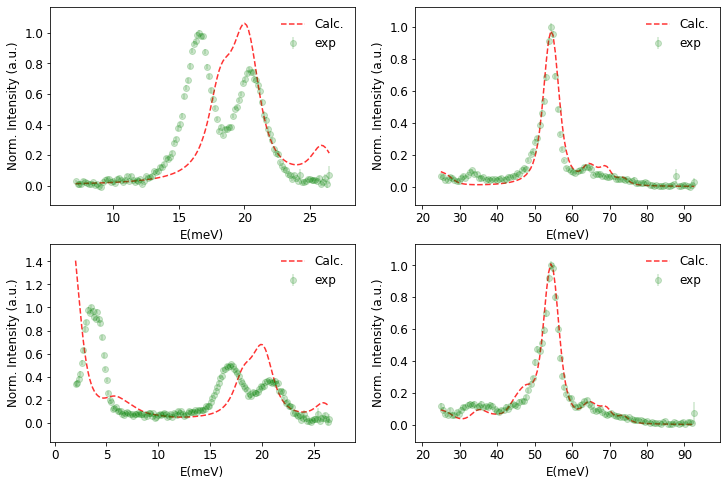

In [2]:
HMSO.PC_value_ini =  np.array([1.65, 1.6, 1.5, 80, 75, 60, 0.50, 0.30, 0.2]) 
HMSO.FWHM=1

# define a function to plot 6 INS pattern together
# Evaluate_pattern(dataset = i, Plotcontrol=True, UsePCini=True) automatically plot a singel INS dataset and return the Chi^2 of calcualted pattern 
# if UsePCini = True, use
def PlotINS(cls,control=False ):
    plt.figure(figsize=(12,8))
    for i in range(2):
        plt.subplot(2,2,1+i*2)
        chi,x,y = cls.Evaluate_pattern(dataset = i, Plotcontrol=True, UsePCini=control)
    for i in range(2,4):
        plt.subplot(2,2,i*2-2)
        chi,x,y = cls.Evaluate_pattern(dataset = i, Plotcontrol=True, UsePCini=control)

PlotINS(HMSO, True)

np.set_printoptions(precision=4,suppress=True)
print(HMSO.eigensys()[0])

## Search parameter space

In [13]:
# for-loops grid search within given Boundary of parameter space

# Boundary = [np.linspace(1.6, 1.7, 3),
#             np.linspace(1.4, 1.6, 3),
#             np.linspace(1.4, 1.6, 3),
#             np.linspace(75, 85, 3),
#             np.linspace(75, 85, 3),
#             np.linspace(55, 65, 3),
#             np.linspace(0.5, 0.5, 1),
#             np.linspace(0.35, 0.15, 5),
#             np.linspace(0.35, 0.15, 5),
#            ]
#
Boundary = [np.linspace(1.62, 1.68, 4),
            np.linspace(1.55, 1.58, 3),
            np.linspace(1.38, 1.42, 3),
            np.linspace(81, 81, 1),
            np.linspace(80, 80, 1),
            np.linspace(55, 58, 4),
            np.linspace(0.5, 0.5, 1),
            np.linspace(0.3, 0.3, 1),
            np.linspace(0.1, 0.2, 5),
           ]
HMSO.PCsearch(Boundary, "HMSO_PCsearch3.dat")

'Done!'

In [3]:
# check several good PC parameters
Search=np.loadtxt("HMSO_PCsearch3.dat", skiprows=1) 
print(Search[0:10])

[[ 1.283  1.64   1.58   1.38  81.    80.    55.     0.5    0.3    0.125]
 [ 1.514  1.64   1.58   1.4   81.    80.    55.     0.5    0.3    0.125]
 [ 1.591  1.64   1.58   1.4   81.    80.    56.     0.5    0.3    0.125]
 [ 1.727  1.64   1.58   1.42  81.    80.    56.     0.5    0.3    0.125]
 [ 1.739  1.64   1.58   1.38  81.    80.    56.     0.5    0.3    0.125]
 [ 1.89   1.64   1.58   1.38  81.    80.    56.     0.5    0.3    0.1  ]
 [ 1.897  1.64   1.58   1.42  81.    80.    55.     0.5    0.3    0.125]
 [ 2.334  1.64   1.58   1.38  81.    80.    55.     0.5    0.3    0.1  ]
 [ 2.346  1.64   1.58   1.42  81.    80.    55.     0.5    0.3    0.15 ]
 [ 2.4    1.64   1.58   1.38  81.    80.    57.     0.5    0.3    0.1  ]]


##  Point Charge fit

In [5]:
HMSO.PC_value_ini =  Search[0][1:]  # use the best result from PCsearch
HMSO.PCfit(TargetChi2energy=0.05)  # use default method ('Nelder-Mead') to fine mininum, PC_values are automatically updated

 final_simplex: (array([[ 1.639 ,  1.5768,  1.3937, 80.9665, 79.405 , 54.9138,  0.5017,
         0.3033,  0.1238,  1.0457],
       [ 1.639 ,  1.5768,  1.3937, 80.9664, 79.4048, 54.9138,  0.5017,
         0.3033,  0.1238,  1.0457],
       [ 1.639 ,  1.5768,  1.3937, 80.9666, 79.4049, 54.9137,  0.5017,
         0.3033,  0.1238,  1.0457],
       [ 1.639 ,  1.5768,  1.3937, 80.9665, 79.4047, 54.9139,  0.5017,
         0.3033,  0.1238,  1.0458],
       [ 1.639 ,  1.5768,  1.3937, 80.9671, 79.4049, 54.9139,  0.5017,
         0.3033,  0.1238,  1.0457],
       [ 1.639 ,  1.5768,  1.3937, 80.9664, 79.4047, 54.9138,  0.5017,
         0.3033,  0.1238,  1.0458],
       [ 1.639 ,  1.5767,  1.3937, 80.9662, 79.4046, 54.9139,  0.5017,
         0.3033,  0.1238,  1.0458],
       [ 1.639 ,  1.5767,  1.3937, 80.9663, 79.4044, 54.9142,  0.5017,
         0.3033,  0.1238,  1.0458],
       [ 1.639 ,  1.5767,  1.3937, 80.9662, 79.4045, 54.914 ,  0.5017,
         0.3033,  0.1238,  1.0458],
       [ 1.639 ,  1.

Eigen-enerigies =  [ 0.      0.1361 16.4439 16.9462 20.2438 20.844  31.7167 32.0432 53.1686
 54.8269 64.0318 66.3871 66.7749 71.5532 71.9267 74.5561 75.4988]


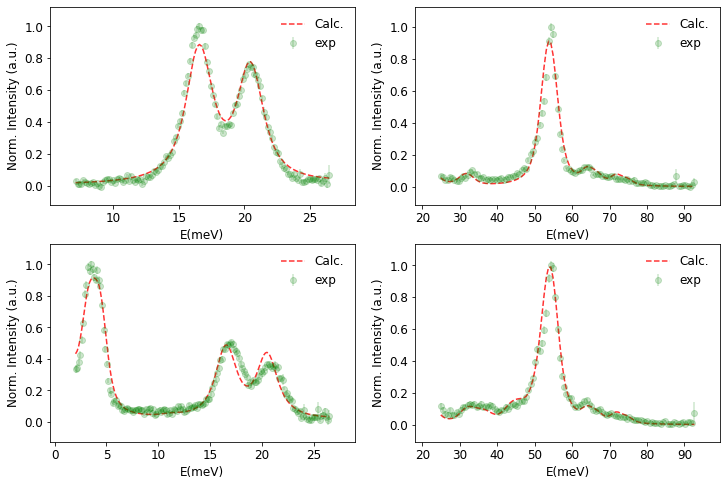

In [6]:
print("Eigen-enerigies = ",HMSO.eigenval)
PlotINS(HMSO) # check new fit

In [7]:
HMSO.writefile("HMSO_PCfit_solution.dat");  # wirte results to a data file named "EMSO_PCfit1.dat"

## Calculate susceptibility 

(array([  2.        ,   7.15789474,  12.31578947,  17.47368421,
         22.63157895,  27.78947368,  32.94736842,  38.10526316,
         43.26315789,  48.42105263,  53.57894737,  58.73684211,
         63.89473684,  69.05263158,  74.21052632,  79.36842105,
         84.52631579,  89.68421053,  94.84210526, 100.        ]),
 array([0.18881602, 0.60531681, 1.03036551, 1.45283555, 1.87186063,
        2.28733583, 2.69935424, 3.10807695, 3.51368789, 3.9163754 ,
        4.31632212, 4.71369857, 5.10865965, 5.50134355, 5.89187284,
        6.28035651, 6.66689278, 7.05157178, 7.43447802, 7.81569243]))

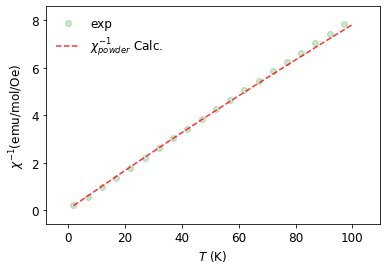

In [8]:
# Power inverse suceptibility without Weiss_field correction
HMSO.Powder_InverseSusceptibility(B=0.1, dataset=0,Temperature_range=np.linspace(2,100,20))

## Magnizitation

H(T)    M_powder(5K), M_powder(10K), M_powder(40K)
[0. 0. 0. 0.]
[0.5       1.9460387 1.0412242 0.2731749]
[1.        3.2455159 1.9665852 0.5442912]
[1.5       3.9496725 2.7133954 0.8113658]
[2.        4.3195052 3.2784304 1.0725603]
[2.5       4.5250648 3.6914849 1.3262385]
[3.        4.650104  3.9899884 1.5710089]
[3.5       4.733746  4.2065718 1.8057499]
[4.        4.7944976 4.3659228 2.029618 ]
[4.5       4.8414557 4.4855544 2.2420413]
[5.        4.8793521 4.5775354 2.442701 ]
[5.5       4.9108365 4.6500905 2.6315045]
[6.        4.9375247 4.7088153 2.8085527]
[7.        4.9805038 4.7988601 3.1285518]
[8.        5.0138679 4.8661163 3.4061073]
[9.        5.0409486 4.9196406 3.6457158]
[10.         5.0639031  4.9641493  3.8522508]
[11.         5.0841584  5.0022949  4.030494 ]
[12.         5.1026615  5.0357086  4.1848683]
[13.         5.120042   5.0654869  4.3193128]
[14.         5.1367222  5.0924261  4.43725  ]
Time used: 0:02:19.869485


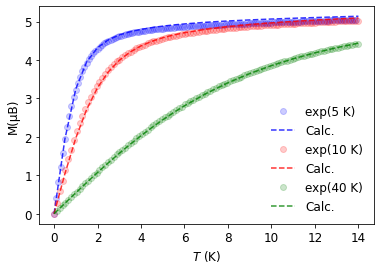

In [10]:
Field=np.concatenate((np.linspace(0, 6, 13), np.linspace(7, 14, 8)), axis=None)
MH=np.zeros((len(Field),len(HMSO.EXP_MH)+1))
MH[:,0]=Field
time1=datetime.now()
print('H(T)    M_powder(5K), M_powder(10K), M_powder(40K)')
for i in range(len(Field)):
    for j in range(len(HMSO.EXP_MH)):        
        MH[i][j+1]= float(HMSO.Powder_Magnetization(dataset=j, B_range=[Field[i]], Weiss_field=0 ,intergration_step=10, Plotcontrol=False)[1])      
    print(MH[i])
print('Time used:', datetime.now()-time1)

color=['b','r', 'g']
for i in range(len(HMSO.EXP_MH)):
    plt.plot(HMSO.EXP_MH[i].x, HMSO.EXP_MH[i].y, 'o', color=color[i], alpha=0.2, label='exp(%d K)' %HMSO.EXP_MH[i].Temperature);
    plt.plot(MH[:,0], MH[:,i+1], '--', color=color[i], alpha=0.8, label='Calc.');
Frontsize=12
plt.legend(loc='lower right', frameon=False,fontsize=Frontsize)    
plt.xlabel('$T$ (K)',fontsize=Frontsize);
plt.ylabel('M(μB)',fontsize=Frontsize);
plt.xticks(fontsize=Frontsize);
plt.yticks(fontsize=Frontsize);